In [5]:
import yfinance as yf
import datetime

In [7]:
stock = yf.download('^SPX', period='3mo', interval='1h')
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-22 09:30:00-04:00,4987.330078,4996.700195,4976.919922,4979.169922,4979.169922,0
2024-04-22 10:30:00-04:00,4979.290039,4987.370117,4969.399902,4979.220215,4979.220215,259970005
2024-04-22 11:30:00-04:00,4979.220215,4999.609863,4978.879883,4992.580078,4992.580078,212704076
2024-04-22 12:30:00-04:00,4992.569824,5015.250000,4988.450195,5015.080078,5015.080078,189351284
2024-04-22 13:30:00-04:00,5015.189941,5038.229980,5014.529785,5035.979980,5035.979980,222306901
...,...,...,...,...,...,...
2024-07-19 11:30:00-04:00,5514.209961,5532.470215,5509.479980,5518.609863,5518.609863,241121354
2024-07-19 12:30:00-04:00,5518.529785,5519.250000,5497.040039,5503.339844,5503.339844,207616490
2024-07-19 13:30:00-04:00,5503.350098,5514.500000,5499.120117,5504.189941,5504.189941,199529817


<Axes: xlabel='Datetime'>

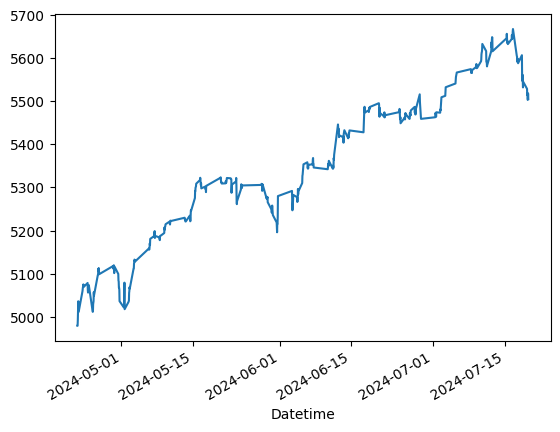

In [8]:
stock.Close.plot()

In [15]:
stock.tz_convert('CET')

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-07-09 02:00:00+02:00,56704.597656,56704.597656,56704.597656,56704.597656,56704.597656,0
2024-07-09 02:02:00+02:00,56666.656250,56666.656250,56666.656250,56666.656250,56666.656250,0
2024-07-09 02:03:00+02:00,56682.386719,56682.386719,56682.386719,56682.386719,56682.386719,0
2024-07-09 02:05:00+02:00,56650.324219,56650.324219,56650.324219,56650.324219,56650.324219,0
2024-07-09 02:08:00+02:00,56706.832031,56706.832031,56706.832031,56706.832031,56706.832031,0
...,...,...,...,...,...,...
2024-07-09 15:40:00+02:00,57295.679688,57295.679688,57295.679688,57295.679688,57295.679688,0
2024-07-09 15:41:00+02:00,57213.566406,57213.566406,57213.566406,57213.566406,57213.566406,0
2024-07-09 15:44:00+02:00,57082.761719,57082.761719,57082.761719,57082.761719,57082.761719,0
